In [1]:
# imports and function definitions
import numpy as np
import sympy as sym
from scipy.integrate import solve_bvp # solve boundary value problem
from scipy.integrate import solve_ivp # solve initial value problem
from scipy.optimize import minimize
from scipy.linalg import norm
import math
pi = math.pi
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
nt = 101
T = 1
dt = T/(nt-1)
time = np.linspace(0,T,nt)

In [3]:
def dynamics(t, q, u):
    q11, q12, q13, q14, q21, q22, q23, q24, q31, q32, q33, q34, q41, q42, q43, q44 = q 
    u1, u2, u3 = u

    dq11dt = u3*q12 - u2*q13
    dq12dt  = -u3*q11 + u1*q13
    dq13dt = u2*q11 - u1*q12
    dq14dt = q11
    dq21dt = u3*q22 - u2*q23
    dq22dt = -u3*q21 + u1*q23
    dq23dt = u2*q21 - u1*q22
    dq24dt = q21
    dq31dt = u3*q32 - u2*q33
    dq32dt = -u3*q31 + u1*q33
    dq33dt = u2*q31 - u1*q32
    dq34dt = q31
    dq41dt = u3*q42 - u2*q43
    dq42dt = -u3*q41 + u1*q43
    dq43dt = u2*q41 - u1*q42
    dq44dt = q41

    dqdt = [dq11dt, dq12dt, dq13dt, dq14dt, dq21dt, dq22dt, dq23dt, dq24dt, dq31dt, dq32dt, dq33dt, dq34dt, dq41dt, dq42dt, dq43dt, dq44dt]
    return dqdt

In [4]:
## initial conditions

q0 = np.array([[1, 0, 0,0], 
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]])
u0 = np.array([[0.5], [0.5], [0.5]])
display(u0)
u_initials = u0*np.ones((3,nt))
display(u_initials.shape)

## our initial conditions through the time line are the same. 
q0_flatten1d = q0.flatten()
q0_flatten = np.reshape(q0_flatten1d, (16, 1))

q_initials = q0_flatten*np.ones((1, nt))
display(q_initials.shape)
display(q0_flatten1d.shape)


array([[0.5],
       [0.5],
       [0.5]])

(3, 101)

(16, 101)

(16,)

In [5]:
q0_flatten1d
u0.shape

(3, 1)

In [6]:
## stack q and u initials for 101 time step into one matrix
state_initials = np.vstack((q_initials, u_initials))
display(state_initials.shape)

(19, 101)

In [7]:
sim = solve_ivp(lambda t, y: dynamics(t,y,u0), [time[0], time[-1]], q0_flatten1d, t_eval=time)

In [8]:
display(sim.y.shape)

(16, 101)

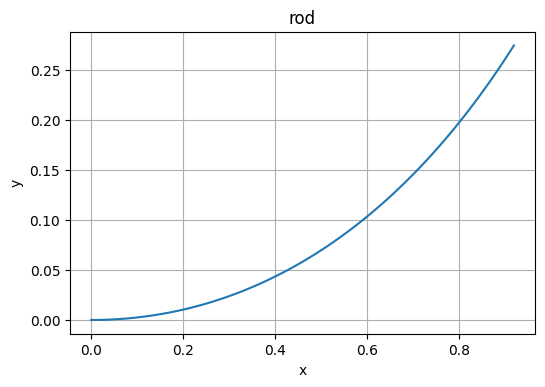

In [9]:
plt.figure(dpi=100,facecolor='w')
plt.plot(sim.y[3],sim.y[7])
axes = plt.gca()
plt.title('rod')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [10]:
display(sim.y)

array([[ 1.        ,  0.999975  ,  0.9999    , ...,  0.77396726,
         0.7696182 ,  0.76523643],
       [ 0.        , -0.00498744, -0.0099495 , ..., -0.32024167,
        -0.3213556 , -0.32242044],
       [ 0.        ,  0.00501244,  0.0100495 , ...,  0.54627441,
         0.5517374 ,  0.55718401],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

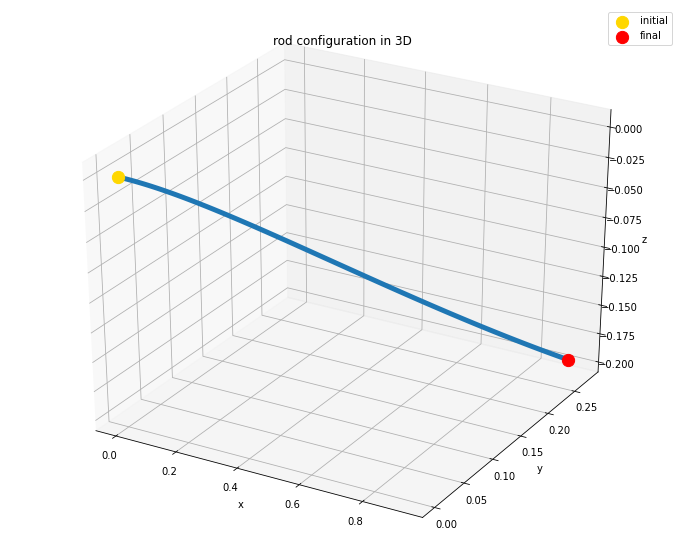

In [11]:
## plot the initial trajectory in 3D
from mpl_toolkits import mplot3d
q14, q24, q34 = sim.y[3], sim.y[7], sim.y[11]
### Interpret initial q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.plot3D(x, y, z, linewidth=5)

In [12]:
print(x[-1], y[-1], z[-1])
print(u_initials)

0.919736303584141 0.27489541849566645 -0.1946317220798074
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 

In [13]:
# use arc trajectory as initial guess
# u0 = np.concatenate((np.ones((1,nt)),-0.5 * np.ones((1,N))),axis=0)
# xu0 = np.concatenate((sim.y,u0),axis=0) # columns are time, rows are x, y, theta, u1, u2
# xd = np.zeros((3,N))
# dt = T/(N-1)


# def cost_fun(xu,Q,R,P,N,dt,xd):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   x_diff = x - xd
#   running_cost = np.zeros((1,N))
#   for i in range(N):
#     running_cost[0,i] = dt * 0.5 * (np.linalg.multi_dot([x_diff[:,i].T, Q, x_diff[:,i]]) \
#                             + np.linalg.multi_dot([u[:,i].T, R, u[:,i]]))
#   cost = np.sum(running_cost) + 0.5 * (np.linalg.multi_dot([x_diff[:,N-1].T, P, x_diff[:,N-1]]))
#   return cost


# def dynamics(xu):
#   xu = xu.reshape((5,N))
#   x = xu[0:3,:]
#   u = xu[3:5,:]
#   error = np.zeros((1,3*(N)))
#   j = 0
#   for i in range(N-1):
#     error[:,j] = x[0,i+1] - (x[0,i] + dt * np.cos(x[2,i]) * u[0,i])
#     error[:,j+1] = x[1,i+1] - (x[1,i] + dt * np.sin(x[2,i]) * u[0,i])
#     error[:,j+2] = x[2,i+1] - (x[2,i] + dt * u[1,i])
#     j = j + 3
#   # enforce initial condition 
#   error[:,j] = x[0,0] - 0
#   error[:,j+1] = x[1,0] - 0
#   error[:,j+2] = x[2,0] - (pi/2)
#   return error.flatten()

In [14]:
## use arc trajectory as initial guess and stack initial u with it to form our state_initials
state_initials = np.vstack((sim.y, u_initials))
state_initials.shape

(19, 101)

In [15]:
## construct costfunction
c1, c2, c3 = 1., 1., 1.
P = 900                                            # weight on final cost
xd, yd, zd = 0.1, 0.7, 0.9                       # desired final conditions


def cost_function(state_initials, nt, dt,c1,c2,c3, P):
    state_initials = state_initials.reshape((19,nt))
    running_cost = np.zeros((1,nt))
    # print(state_initials.shape)
    for i in range(nt):
        running_cost[0, i] = dt*0.5*(c1*(state_initials[16,i])**2 + c2*(state_initials[17, i])**2 + c3*(state_initials[18,i]))
    # print("running cost", running_cost)
    final_cost = P*(abs(state_initials[3,-1]-xd) + abs(state_initials[7,-1]-yd) + abs(state_initials[11,-1]-zd))
    cost = np.sum(running_cost) + final_cost
    # print("cost", cost)
    return cost

# cost_function(state_initials, nt, dt,c1,c2,c3)

In [16]:
def system_dynamics(state_initials):
    nt = 101
    dt = 1/(nt - 1)
    # print(state_initials.shape)
    state_initials = state_initials.reshape((19,nt))
    q = state_initials[0:16,:]
    u = state_initials[16:19,:]
    error = np.zeros((1, 16*nt))
    final_weight = 100.
    j = 0
    for i in range(nt-1):
        
        error[:,j] = q[0,i+1] - (q[0,i] + dt * (u[2,i]*q[1,i] - u[1,i]*q[2,i]))
        error[:,j+1] = q[1,i+1] - (q[1,i] + dt * (-u[2,i]*q[0,i] + u[0,i]*q[2,i]))
        error[:,j+2] = q[2,i+1] - (q[2,i] + dt * (u[1,i]*q[0,i] - u[0,i]*q[1,i]))
        error[:,j+3] = q[3,i+1] - (q[3,i] + dt*q[0,i])
                                       
        error[:,j+4] = q[4,i+1] - (q[4,i] + dt * (u[2,i]*q[5,i] - u[1,i]*q[6,i]))
        error[:,j+5] = q[5,i+1] - (q[5,i] + dt * (-u[2,i]*q[4,i] + u[0,i]*q[6,i]))
        error[:,j+6] = q[6,i+1] - (q[6,i] + dt * (u[1,i]*q[4,i] - u[0,i]*q[5,i]))
        error[:,j+7] = q[7,i+1] - (q[7,i] + dt*q[4,i])
                                       
        error[:,j+8] = q[8,i+1] - (q[8,i] + dt * (u[2,i]*q[9,i] - u[1,i]*q[10,i]))
        error[:,j+9] = q[9,i+1] - (q[9,i] + dt * (-u[2,i]*q[8,i] + u[0,i]*q[10,i]))
        error[:,j+10] = q[10,i+1] - (q[10,i] + dt * (u[1,i]*q[8,i] - u[0,i]*q[9,i])) ## need to double check
        error[:,j+11] = q[11,i+1] - (q[11,i] + dt*q[8,i])
                                         
        error[:,j+12] = q[12,i+1] - (q[12,i] + dt * (u[2,i]*q[13,i] - u[1,i]*q[14,i]))
        error[:,j+13] = q[13,i+1] - (q[13,i] + dt * (-u[2,i]*q[12,i] + u[0,i]*q[14,i]))
        error[:,j+14] = q[14,i+1] - (q[14,i] + dt * (u[1,i]*q[12,i] - u[0,i]*q[13,i]))
        error[:,j+15] = q[15,i+1] - (q[15,i] + dt*q[12,i])
                                         
        j = j + 16
            
    # enforce final condition 
#     error[:,j] = q[0,-1] - 1
#     error[:,j+1] = q[1,-1] - 0
#     error[:,j+2] = q[2,-1] - 0
#     error[:,j+3] = q[3,-1] - xd                                      
#     error[:,j+4] = q[4,-1] - 0
#     error[:,j+5] = q[5,-1] - 1
#     error[:,j+6] = q[6,-1] - 0
#     error[:,j+7] = q[7,-1] - yd
                                       
#     error[:,j+8] = q[8,-1] - 0
#     error[:,j+9] = q[9,-1] - 0
#     error[:,j+10] = q[10,-1] - 1
#     error[:,j+11] = q[11,-1] - zd
                                         
#     error[:,j+12] = q[12,-1] - 0
#     error[:,j+13] = q[13,-1] - 0
#     error[:,j+14] = q[14,-1] - 0
#     error[:,j+15] = q[15,-1] - 1
#     error[:,j+11] = q[11,-1] - 0
                                         
    
    # enforce initial condition 
    error[:,j] = q[0,0] - 1
    error[:,j+1] = q[1,0] - 0
    error[:,j+2] = q[2,0] - 0
    error[:,j+3] = q[3,0] - 0
                                       
    error[:,j+4] = q[4,0] - 0
    error[:,j+5] = q[5,0] - 1
    error[:,j+6] = q[6,0] - 0
    error[:,j+7] = q[7,0] - 0
                                       
    error[:,j+8] = q[8,0] - 0
    error[:,j+9] = q[9,0] - 0
    error[:,j+10] = q[10,0] - 1
    error[:,j+11] = q[11,0] - 0
                                         
    error[:,j+12] = q[12,0] - 0
    error[:,j+13] = q[13,0] - 0
    error[:,j+14] = q[14,0] - 0
    error[:,j+15] = q[15,0] - 1

    pos_error = np.absolute(error)

    return pos_error.flatten()
            


In [17]:
con = ({'type': 'eq', 'fun': system_dynamics})


sol = minimize(cost_function, state_initials, args=(nt, dt,c1,c2,c3, P), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=con, tol=1e-3, callback=None, options=None)

KeyboardInterrupt: 

In [ ]:
opt = sol.x.reshape((19,nt))
plt.figure(dpi=100,facecolor='w')
plt.plot(opt[3,:],opt[7,:])
axes = plt.gca()
# axes.set_xlim([-0.5,0.75])
# axes.set_ylim([-0.75,0.25])
plt.title('Optimized Trajectory')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()
print("x = ", opt[3,-1], ", y = ", opt[7,-1], ", z = ", opt[11,-1]) 
print("xd = ", xd, ", yd = ", yd, ", zd = ", zd) 
print("rotation matrix", opt[:,-1])


In [ ]:
## plot the initial trajectory in 3D
from mpl_toolkits import mplot3d
q14, q24, q34 = opt[3], opt[7], opt[11]
### Interpret initial q's
x = [q14[i] for i in range(nt)]
y = [q24[i] for i in range(nt)]
z = [q34[i] for i in range(nt)]

# 3D plot
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.scatter(x[0], y[0], z[0], marker='o', s=150, color='gold', label='initial')
ax.scatter(x[-1], y[-1], z[-1], marker='o', s=150, color='red', label='final')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.legend()
ax.plot3D(x, y, z, linewidth=5)

In [ ]:
### 3D mesh visualization

def plot_cylinder_segment(x0,y0,z0,xf,yf,zf):
  # input: beginning and ending center points of cylinder
  # function modified from: https://stackoverflow.com/questions/39822480/plotting-a-solid-cylinder-centered-on-a-plane-in-matplotlib

  # axis and radius
    p0 = np.array([x0, y0, z0]) # point at one end
    p1 = np.array([xf, yf, zf]) # point at other end
    R = .01                     # radius

    v = p1 - p0                 # vector in direction of axis
    mag = norm(v)               # magnitude of vector
    v = v / mag                 # unit vector in direction of axis

    # make some vector not in the same direction as v
    not_v = np.array([1, 0, 0])
    if (v == not_v).all():
          not_v = np.array([0, 1, 0])

    n1 = np.cross(v, not_v)     # make vector perpendicular to v
    n1 /= norm(n1)              # normalize n1
    n2 = np.cross(v, n1)        # unit vector perpendicular to v and n1

      # surface ranges over t from 0 to length of axis and 0 to 2*pi
    t = np.linspace(0, mag, 2)
    theta = np.linspace(0, 2 * np.pi, 12)
    rsample = np.linspace(0, R, 2)
    t, theta2 = np.meshgrid(t, theta)   # use meshgrid to make 2d arrays
    rsample,theta = np.meshgrid(rsample, theta)

      # generate coordinates for surface
    X, Y, Z = [p0[i] + v[i]*t + R*np.sin(theta2)*n1[i] + R*np.cos(theta2)*n2[i] for i in [0, 1, 2]]
    ax.plot_surface(X, Y, Z, color='orange')

### 3d plot parameters and labels
fig2 = plt.figure(figsize = (12,10))
ax = plt.axes(projection ='3d')
ax.set_title('rod configuration in 3D')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### 3D plot of each element
for i in list(range(nt-1)):
    plot_cylinder_segment(x[i],y[i],z[i],x[i+1],y[i+1],z[i+1])
plt.show()